Dataset shape: (297, 8)
Features: ['thalach', 'age', 'chol', 'thal', 'ca', 'trestbps', 'cp', 'oldpeak']

K-MEANS CLUSTERING
Optimal K selected: 3
Silhouette Score: 0.271
Adjusted Rand Index: 0.263


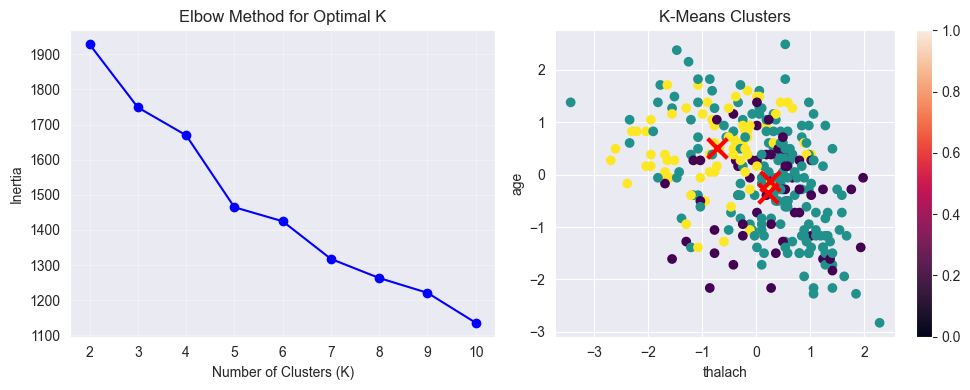


HIERARCHICAL CLUSTERING
Number of clusters: 3
Silhouette Score: 0.258
Adjusted Rand Index: 0.245


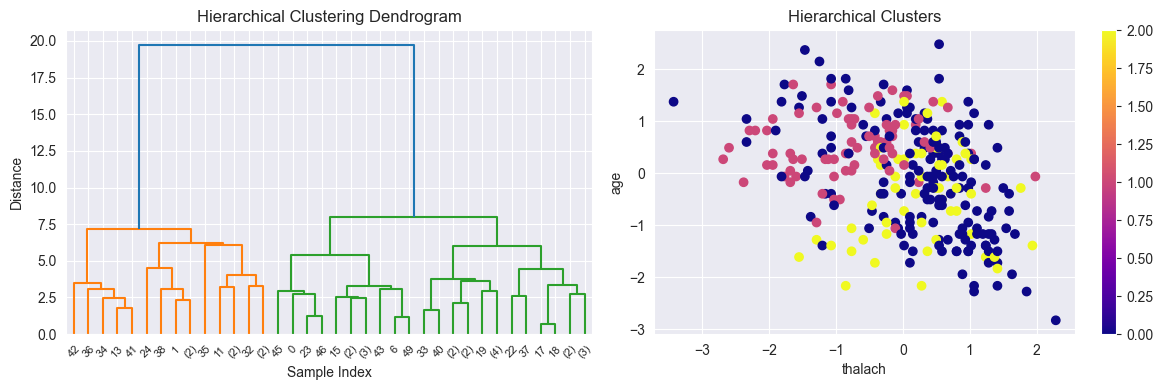


CLUSTERING COMPARISON
         Method  Silhouette Score  Adjusted Rand Index
0       K-Means          0.270878             0.263268
1  Hierarchical          0.258399             0.245441

K-Means cluster distribution:
0     57
1    164
2     76
Name: count, dtype: int64

Hierarchical cluster distribution:
0    164
1     76
2     57
Name: count, dtype: int64

Actual target distribution:
target
0    160
1    137
Name: count, dtype: int64

Clustering analysis completed!


In [1]:
# Heart Disease UCI Dataset - Unsupervised Learning
# Notebook 05: Clustering Analysis & Pattern Discovery

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load selected features data
df = pd.read_csv('../data/processed/selected_features.csv')

# Separate features and target
X = df.drop('target', axis=1)  # All features except target
y = df['target']  # Target only

print("Dataset shape:", X.shape)
print("Features:", X.columns.tolist())

# K-Means Clustering
print("\n" + "=" * 30)
print("K-MEANS CLUSTERING")
print("=" * 30)

# Find optimal K using elbow method
inertias = []
k_range = range(2, 11)

# Inertia: Sum of squared distances from each point to its cluster center
# Lower inertia = tighter clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True, alpha=0.3)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)  # Train the model and assigns cluster labels

print(f"Optimal K selected: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X, kmeans_labels):.3f}")

# Compare clusters with actual labels (How well do clusters match actual heart disease classes?)
print(f"Adjusted Rand Index: {adjusted_rand_score(y, kmeans_labels):.3f}")

# Plot K-means results
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('K-Means Clusters')
plt.colorbar()

plt.tight_layout()
plt.show()

# Hierarchical Clustering
print("\n" + "=" * 35)
print("HIERARCHICAL CLUSTERING")
print("=" * 35)

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(
    n_clusters=optimal_k)  # Agglomerative: Bottom-up approach (starts with each point as its own cluster), then Repeatedly merges closest clusters until reaching desired number
hierarchical_labels = hierarchical.fit_predict(X)

print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {silhouette_score(X, hierarchical_labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, hierarchical_labels):.3f}")

# Dendrogram (Tree showing how clusters merge)
sample_size = min(50, len(X))
sample_indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X.iloc[sample_indices]

linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 4))

# Y-axis (Distance): How different clusters are when merged
# Horizontal cuts: Different K values (cutting higher = fewer clusters)

plt.subplot(1, 2, 1)
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')

# Plot hierarchical clustering results
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical_labels, cmap='plasma')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Hierarchical Clusters')
plt.colorbar()

plt.tight_layout()
plt.show()

# Compare clustering results
print("\n" + "=" * 25)
print("CLUSTERING COMPARISON")
print("=" * 25)

comparison_results = pd.DataFrame({
    'Method': ['K-Means', 'Hierarchical'],
    'Silhouette Score': [
        silhouette_score(X, kmeans_labels),
        silhouette_score(X, hierarchical_labels)
    ],
    'Adjusted Rand Index': [
        adjusted_rand_score(y, kmeans_labels),
        adjusted_rand_score(y, hierarchical_labels)
    ]
})

print(comparison_results)

# Show cluster distribution vs actual labels
print(f"\nK-Means cluster distribution:")
print(pd.Series(kmeans_labels).value_counts().sort_index())

print(f"\nHierarchical cluster distribution:")
print(pd.Series(hierarchical_labels).value_counts().sort_index())

print(f"\nActual target distribution:")
print(y.value_counts().sort_index())

print("\nClustering analysis completed!")